## 기본 모듈 import

In [2]:
import numpy as np

## 확률적 경사 하강법 (SGD)
미분한 값 (기울기)를 기반으로 parameter update

In [1]:
class SGD:
    def __init__(self, lr = 0.01) :
        self.lr = lr

    def update(self, params, grads) :
        for key in params.keys():
            params[key] -= self.lr * grads[key]

## 모멘텀 기법 (Momentum)
물리학 가속도와 같은 원리, 기울기가 작은 축으로 이동시에는 효과적임, 기울기가 큰 축으로는 안정적이지 않음

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None :
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
    
        for key in params.keys():
            self.v[key] - self.momentum * self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

## AdaGrad
학습률 감소 기법을 사용하여 학습률을 매개변수마다 다르게 적용하며 많이 움직인 원소는 학습률이 작아짐

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

## Adam
Momentum과 AdaGrad의 이점을 합친 기법

In [5]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

## 가중치의 초기값
1. 활성화 함수로 Relu를 사용할 때는 He 초기값 사용 (Relu는 음수 영역은 0이기에 Xavier 초기값보다 2배 더 많이)
2. sigmoid, tanh 등의 S자 모양 곡선일 때는 Xavier 초기값 사용

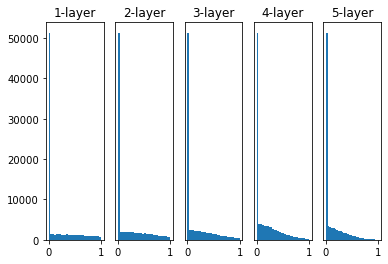

In [10]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 배치 정규화 : 각 층이 활성화를 적당히 퍼뜨리도록 강제하는 방법
1. 학습을 빨리 진행할 수 있다. (학습 속도 개선)
2. 초기값에 크게 의존하지 않는다.
3. 오버피팅을 억제한다. (드롭아웃 등의 필요성 감소)

============== 1/16 ==============
epoch:0 | 0.117 - 0.114


d:\git\Deep_Learning_From_Scratch\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
d:\git\Deep_Learning_From_Scratch\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.091
epoch:2 | 0.097 - 0.122
epoch:3 | 0.097 - 0.14
epoch:4 | 0.097 - 0.153
epoch:5 | 0.097 - 0.174
epoch:6 | 0.097 - 0.195
epoch:7 | 0.097 - 0.21
epoch:8 | 0.097 - 0.226
epoch:9 | 0.097 - 0.246
epoch:10 | 0.097 - 0.262
epoch:11 | 0.097 - 0.295
epoch:12 | 0.097 - 0.313
epoch:13 | 0.097 - 0.32
epoch:14 | 0.097 - 0.353
epoch:15 | 0.097 - 0.366
epoch:16 | 0.097 - 0.371
epoch:17 | 0.097 - 0.395
epoch:18 | 0.097 - 0.41


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.42
============== 2/16 ==============
epoch:0 | 0.099 - 0.09


d:\git\Deep_Learning_From_Scratch\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
d:\git\Deep_Learning_From_Scratch\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.087
epoch:2 | 0.097 - 0.104
epoch:3 | 0.097 - 0.128
epoch:4 | 0.097 - 0.159
epoch:5 | 0.097 - 0.184
epoch:6 | 0.097 - 0.204
epoch:7 | 0.097 - 0.229
epoch:8 | 0.097 - 0.254
epoch:9 | 0.097 - 0.276
epoch:10 | 0.097 - 0.294
epoch:11 | 0.097 - 0.327
epoch:12 | 0.097 - 0.34
epoch:13 | 0.097 - 0.363
epoch:14 | 0.097 - 0.372
epoch:15 | 0.097 - 0.393
epoch:16 | 0.097 - 0.419
epoch:17 | 0.097 - 0.436
epoch:18 | 0.097 - 0.453


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.475
============== 3/16 ==============
epoch:0 | 0.109 - 0.106
epoch:1 | 0.383 - 0.1
epoch:2 | 0.522 - 0.157
epoch:3 | 0.59 - 0.181
epoch:4 | 0.67 - 0.227
epoch:5 | 0.727 - 0.257
epoch:6 | 0.742 - 0.293
epoch:7 | 0.801 - 0.333
epoch:8 | 0.857 - 0.368
epoch:9 | 0.884 - 0.402
epoch:10 | 0.9 - 0.443
epoch:11 | 0.923 - 0.482
epoch:12 | 0.936 - 0.499
epoch:13 | 0.947 - 0.519
epoch:14 | 0.954 - 0.55
epoch:15 | 0.958 - 0.57
epoch:16 | 0.966 - 0.597
epoch:17 | 0.973 - 0.611
epoch:18 | 0.982 - 0.632


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.985 - 0.644
============== 4/16 ==============
epoch:0 | 0.111 - 0.129
epoch:1 | 0.223 - 0.148
epoch:2 | 0.346 - 0.218
epoch:3 | 0.457 - 0.282
epoch:4 | 0.538 - 0.352
epoch:5 | 0.604 - 0.406
epoch:6 | 0.645 - 0.465
epoch:7 | 0.668 - 0.501
epoch:8 | 0.71 - 0.541
epoch:9 | 0.725 - 0.576
epoch:10 | 0.748 - 0.607
epoch:11 | 0.764 - 0.631
epoch:12 | 0.768 - 0.659
epoch:13 | 0.795 - 0.679
epoch:14 | 0.82 - 0.699
epoch:15 | 0.827 - 0.718
epoch:16 | 0.831 - 0.724
epoch:17 | 0.84 - 0.746
epoch:18 | 0.841 - 0.757


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.864 - 0.766
============== 5/16 ==============
epoch:0 | 0.102 - 0.067
epoch:1 | 0.108 - 0.127
epoch:2 | 0.11 - 0.285
epoch:3 | 0.114 - 0.385
epoch:4 | 0.118 - 0.443
epoch:5 | 0.124 - 0.502
epoch:6 | 0.128 - 0.547
epoch:7 | 0.131 - 0.585
epoch:8 | 0.139 - 0.624
epoch:9 | 0.149 - 0.657
epoch:10 | 0.151 - 0.696
epoch:11 | 0.157 - 0.72
epoch:12 | 0.174 - 0.75
epoch:13 | 0.184 - 0.774
epoch:14 | 0.195 - 0.79
epoch:15 | 0.214 - 0.8
epoch:16 | 0.236 - 0.815
epoch:17 | 0.226 - 0.828


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.237 - 0.851
epoch:19 | 0.258 - 0.857
============== 6/16 ==============
epoch:0 | 0.118 - 0.126
epoch:1 | 0.117 - 0.226
epoch:2 | 0.117 - 0.462
epoch:3 | 0.117 - 0.592
epoch:4 | 0.117 - 0.676
epoch:5 | 0.117 - 0.732
epoch:6 | 0.117 - 0.775
epoch:7 | 0.117 - 0.805
epoch:8 | 0.117 - 0.824
epoch:9 | 0.117 - 0.851
epoch:10 | 0.117 - 0.862
epoch:11 | 0.117 - 0.875
epoch:12 | 0.117 - 0.888
epoch:13 | 0.117 - 0.899
epoch:14 | 0.117 - 0.908
epoch:15 | 0.117 - 0.921
epoch:16 | 0.117 - 0.932
epoch:17 | 0.117 - 0.941


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.948
epoch:19 | 0.117 - 0.953
============== 7/16 ==============
epoch:0 | 0.1 - 0.099
epoch:1 | 0.116 - 0.312
epoch:2 | 0.116 - 0.6
epoch:3 | 0.116 - 0.709
epoch:4 | 0.116 - 0.775
epoch:5 | 0.117 - 0.834
epoch:6 | 0.117 - 0.858
epoch:7 | 0.117 - 0.875
epoch:8 | 0.116 - 0.897
epoch:9 | 0.116 - 0.916
epoch:10 | 0.116 - 0.934
epoch:11 | 0.116 - 0.941
epoch:12 | 0.118 - 0.951
epoch:13 | 0.117 - 0.96
epoch:14 | 0.117 - 0.965
epoch:15 | 0.117 - 0.971
epoch:16 | 0.117 - 0.979
epoch:17 | 0.117 - 0.981


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.988
epoch:19 | 0.117 - 0.992
============== 8/16 ==============
epoch:0 | 0.116 - 0.123
epoch:1 | 0.117 - 0.281
epoch:2 | 0.117 - 0.602
epoch:3 | 0.116 - 0.704
epoch:4 | 0.117 - 0.782
epoch:5 | 0.117 - 0.822
epoch:6 | 0.117 - 0.88
epoch:7 | 0.117 - 0.915
epoch:8 | 0.117 - 0.948
epoch:9 | 0.117 - 0.962
epoch:10 | 0.117 - 0.979
epoch:11 | 0.117 - 0.982
epoch:12 | 0.116 - 0.988
epoch:13 | 0.116 - 0.989
epoch:14 | 0.116 - 0.993
epoch:15 | 0.116 - 0.995
epoch:16 | 0.116 - 0.996
epoch:17 | 0.116 - 0.996
epoch:18 | 0.116 - 0.997


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.997
============== 9/16 ==============
epoch:0 | 0.117 - 0.12
epoch:1 | 0.116 - 0.521
epoch:2 | 0.116 - 0.737
epoch:3 | 0.116 - 0.804
epoch:4 | 0.116 - 0.848
epoch:5 | 0.117 - 0.914
epoch:6 | 0.117 - 0.962
epoch:7 | 0.117 - 0.961
epoch:8 | 0.117 - 0.983
epoch:9 | 0.117 - 0.99
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.995
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.997
epoch:15 | 0.116 - 0.998
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.997


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.116 - 0.099
epoch:1 | 0.1 - 0.729
epoch:2 | 0.117 - 0.806
epoch:3 | 0.117 - 0.849
epoch:4 | 0.117 - 0.862
epoch:5 | 0.117 - 0.861
epoch:6 | 0.117 - 0.953
epoch:7 | 0.117 - 0.968
epoch:8 | 0.117 - 0.972
epoch:9 | 0.117 - 0.986
epoch:10 | 0.117 - 0.992
epoch:11 | 0.117 - 0.989
epoch:12 | 0.117 - 0.991
epoch:13 | 0.117 - 0.965
epoch:14 | 0.117 - 0.988
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.992


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 1.0
============== 11/16 ==============
epoch:0 | 0.116 - 0.107
epoch:1 | 0.116 - 0.536
epoch:2 | 0.116 - 0.65
epoch:3 | 0.117 - 0.723
epoch:4 | 0.117 - 0.757
epoch:5 | 0.117 - 0.717
epoch:6 | 0.117 - 0.926
epoch:7 | 0.117 - 0.943
epoch:8 | 0.116 - 0.961
epoch:9 | 0.116 - 0.982
epoch:10 | 0.117 - 0.974
epoch:11 | 0.117 - 0.988
epoch:12 | 0.116 - 0.989
epoch:13 | 0.116 - 0.99
epoch:14 | 0.116 - 0.992
epoch:15 | 0.117 - 0.991
epoch:16 | 0.117 - 0.992
epoch:17 | 0.117 - 0.993


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.117 - 0.964
epoch:19 | 0.117 - 0.983
============== 12/16 ==============
epoch:0 | 0.087 - 0.178
epoch:1 | 0.117 - 0.461
epoch:2 | 0.117 - 0.651
epoch:3 | 0.117 - 0.667
epoch:4 | 0.117 - 0.749
epoch:5 | 0.117 - 0.761
epoch:6 | 0.117 - 0.775
epoch:7 | 0.117 - 0.77
epoch:8 | 0.117 - 0.796
epoch:9 | 0.117 - 0.752
epoch:10 | 0.117 - 0.748
epoch:11 | 0.117 - 0.794
epoch:12 | 0.117 - 0.799
epoch:13 | 0.117 - 0.796
epoch:14 | 0.117 - 0.799
epoch:15 | 0.117 - 0.8
epoch:16 | 0.117 - 0.8
epoch:17 | 0.117 - 0.8
epoch:18 | 0.117 - 0.8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.8
============== 13/16 ==============
epoch:0 | 0.092 - 0.15
epoch:1 | 0.116 - 0.562
epoch:2 | 0.116 - 0.658
epoch:3 | 0.116 - 0.744
epoch:4 | 0.116 - 0.716
epoch:5 | 0.116 - 0.845
epoch:6 | 0.116 - 0.863
epoch:7 | 0.116 - 0.872
epoch:8 | 0.116 - 0.873
epoch:9 | 0.116 - 0.882
epoch:10 | 0.116 - 0.89
epoch:11 | 0.116 - 0.892
epoch:12 | 0.117 - 0.891
epoch:13 | 0.117 - 0.893
epoch:14 | 0.117 - 0.893
epoch:15 | 0.117 - 0.892
epoch:16 | 0.117 - 0.895
epoch:17 | 0.117 - 0.893
epoch:18 | 0.117 - 0.896


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.894
============== 14/16 ==============
epoch:0 | 0.092 - 0.113
epoch:1 | 0.116 - 0.425
epoch:2 | 0.117 - 0.348
epoch:3 | 0.117 - 0.485
epoch:4 | 0.117 - 0.507
epoch:5 | 0.117 - 0.461
epoch:6 | 0.117 - 0.507
epoch:7 | 0.117 - 0.507
epoch:8 | 0.117 - 0.517
epoch:9 | 0.117 - 0.505
epoch:10 | 0.117 - 0.52
epoch:11 | 0.116 - 0.507
epoch:12 | 0.116 - 0.524
epoch:13 | 0.116 - 0.524
epoch:14 | 0.117 - 0.52
epoch:15 | 0.116 - 0.533
epoch:16 | 0.116 - 0.537
epoch:17 | 0.116 - 0.554
epoch:18 | 0.117 - 0.498


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.562
============== 15/16 ==============
epoch:0 | 0.092 - 0.11
epoch:1 | 0.117 - 0.272
epoch:2 | 0.117 - 0.408
epoch:3 | 0.117 - 0.434
epoch:4 | 0.117 - 0.497
epoch:5 | 0.117 - 0.485
epoch:6 | 0.117 - 0.486
epoch:7 | 0.116 - 0.5
epoch:8 | 0.116 - 0.504
epoch:9 | 0.116 - 0.504
epoch:10 | 0.116 - 0.501
epoch:11 | 0.116 - 0.502
epoch:12 | 0.116 - 0.504
epoch:13 | 0.116 - 0.504
epoch:14 | 0.116 - 0.507
epoch:15 | 0.116 - 0.503
epoch:16 | 0.116 - 0.5
epoch:17 | 0.116 - 0.512
epoch:18 | 0.116 - 0.506


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.498
============== 16/16 ==============
epoch:0 | 0.105 - 0.147
epoch:1 | 0.116 - 0.282
epoch:2 | 0.117 - 0.373
epoch:3 | 0.117 - 0.413
epoch:4 | 0.117 - 0.426
epoch:5 | 0.117 - 0.426
epoch:6 | 0.117 - 0.333
epoch:7 | 0.117 - 0.424
epoch:8 | 0.117 - 0.424
epoch:9 | 0.117 - 0.429
epoch:10 | 0.117 - 0.431
epoch:11 | 0.117 - 0.432
epoch:12 | 0.117 - 0.432
epoch:13 | 0.117 - 0.432
epoch:14 | 0.117 - 0.435
epoch:15 | 0.117 - 0.434
epoch:16 | 0.117 - 0.488
epoch:17 | 0.117 - 0.521
epoch:18 | 0.117 - 0.515
epoch:19 | 0.117 - 0.529


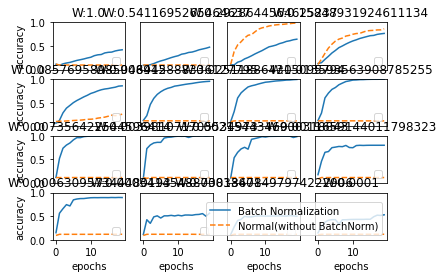

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()